In [721]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [722]:
df = pd.read_csv('Zomatodataset/zomato.csv', encoding='utf-8', encoding_errors = 'ignore')
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


# Data Preprocessing

In [723]:
df.shape

(9551, 21)

In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Get the country Names using the codes

In [725]:
countries = pd.read_excel('Zomatodataset/Country-Code.xlsx', index_col = 'Country Code')

In [726]:
countries

,Country
Country Code,
1,India
14,Australia
30,Brazil
37,Canada
94,Indonesia
148,New Zealand
162,Phillipines
166,Qatar
184,Singapore


In [727]:
countries.loc[14][0]

'Australia'

In [728]:
countries = pd.read_excel('Zomatodataset/Country-Code.xlsx', index_col = 'Country Code')
def get_country_name(code):
    return countries.loc[code][0]

In [729]:
get_country_name(14)

'Australia'

In [730]:
df['Country Name'] = df['Country Code'].apply(get_country_name)

In [731]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Name
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


### Dropping duplicates, if any

In [732]:
df.drop_duplicates(subset = 'Restaurant ID', inplace = True)
df = df.reset_index()
df.drop('index', inplace = True, axis = 1)

In [733]:
df.shape # shape is same so NO duplicates were there

(9551, 22)

### Dropping Less Imp cols

In [734]:
df.drop(['Locality Verbose', 'Locality', 'Rating color', 'Longitude', 'Latitude', 'Country Code', 'Address'], axis = 1, inplace = True)

In [735]:
df.head(3)

,Restaurant ID,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Very Good,270,Phillipines


### Converting the price into a Single Currency system(Dollers)

In [736]:
df.Currency.unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds()',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [737]:
currency = pd.read_csv('Zomatodataset/Currency Exchange(as of dec 2024).csv', index_col = 'Currency')

In [738]:
currency

,Code,Exchange Rate (1 USD)
Currency,,
Botswana Pula,P,13.742067
Brazilian Real,R$,2.178619
Dollar,$,1.000000
Emirati Diram,AED,3.741883
Indian Rupees,Rs.,0.161403
Indonesian Rupiah,IDR,0.000844
NewZealand,$,7.774952
Pounds,NaN,17.368304
Qatari Rial,QR,3.775293


In [739]:
df['PriceWITHCurrency'] = df['Average Cost for two'].astype(str) + " " + df['Currency']

In [740]:
df.head(2)

,Restaurant ID,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,PriceWITHCurrency
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314,Phillipines,1100 Botswana Pula(P)
1,6304287,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591,Phillipines,1200 Botswana Pula(P)


In [741]:
## Now previous two cols are not required

df.drop(['Average Cost for two', 'Currency'], inplace = True, axis = 1)

In [742]:
df.head(2)

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,PriceWITHCurrency
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",Yes,No,No,No,3,4.8,Excellent,314,Phillipines,1100 Botswana Pula(P)
1,6304287,Izakaya Kikufuji,Makati City,Japanese,Yes,No,No,No,3,4.5,Excellent,591,Phillipines,1200 Botswana Pula(P)


In [743]:
currency = pd.read_csv('Zomatodataset/Currency Exchange(as of dec 2024).csv', index_col = 'Currency')
def get_price_in_dollers(price_currency):
    price = price_currency.split('(')
    price = price[0].split()
    value = int(price[0])
    curr = ' '.join(price[1:])
    doller_equivalent = currency.loc[curr]['Exchange Rate (1 USD)']
    price_in_dollers = value/doller_equivalent
    return np.round_(price_in_dollers, decimals = 2)

In [744]:
get_price_in_dollers('1100 Botswana Pula(P)')

80.05

In [745]:
df['Avg. Cost For two($)'] = df['PriceWITHCurrency'].apply(get_price_in_dollers)

In [746]:
df.head(3)

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,PriceWITHCurrency,Avg. Cost For two($)
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",Yes,No,No,No,3,4.8,Excellent,314,Phillipines,1100 Botswana Pula(P),80.05
1,6304287,Izakaya Kikufuji,Makati City,Japanese,Yes,No,No,No,3,4.5,Excellent,591,Phillipines,1200 Botswana Pula(P),87.32
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",Yes,No,No,No,4,4.4,Very Good,270,Phillipines,4000 Botswana Pula(P),291.08


In [747]:
df.drop('PriceWITHCurrency', inplace = True, axis = 1)

In [748]:
df.head()

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",Yes,No,No,No,3,4.8,Excellent,314,Phillipines,80.05
1,6304287,Izakaya Kikufuji,Makati City,Japanese,Yes,No,No,No,3,4.5,Excellent,591,Phillipines,87.32
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",Yes,No,No,No,4,4.4,Very Good,270,Phillipines,291.08
3,6318506,Ooma,Mandaluyong City,"Japanese, Sushi",No,No,No,No,4,4.9,Excellent,365,Phillipines,109.15
4,6314302,Sambo Kojin,Mandaluyong City,"Japanese, Korean",Yes,No,No,No,4,4.8,Excellent,229,Phillipines,109.15


# Exploratory Data Analysis

### Restaurants Rating Insights

#### Q1. Which restaurants have consistently received the good ratings?

In [749]:
rating_more_than_4 = df[df['Aggregate rating'] >= 4]['Restaurant Name'].value_counts()
rating_more_than_4

Restaurant Name
Barbeque Nation             23
Pizza Hut                    7
Mocha                        6
Farzi Cafe                   6
Chili's                      5
                            ..
Maplai                       1
Kaidi Kitchen                1
Ciclo Cafe                   1
Fusilli Reasons              1
Walter's Coffee Roastery     1
Name: count, Length: 1238, dtype: int64

Restaurents Which Have Got ( rating >=4 ) more than 5 times

In [750]:
pd.DataFrame(rating_more_than_4[rating_more_than_4>=5])

,count
Restaurant Name,
Barbeque Nation,23
Pizza Hut,7
Mocha,6
Farzi Cafe,6
Chili's,5
Punjab Grill,5


### Q2. Is there a correlation between the number of votes and the aggregate rating?

In [751]:
df.head(2)

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",Yes,No,No,No,3,4.8,Excellent,314,Phillipines,80.05
1,6304287,Izakaya Kikufuji,Makati City,Japanese,Yes,No,No,No,3,4.5,Excellent,591,Phillipines,87.32


In [978]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Votes'], df['Aggregate rating'])

print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant correlation between the number of votes and aggregate rating.")
else:
    print("There is no significant correlation between the number of votes and aggregate rating.")


Pearson Correlation Coefficient: 0.3181
P-value: 0.0000
There is a significant correlation between the number of votes and aggregate rating.


### Q3.What is the most common rating given to restaurants?

In [753]:
pd.DataFrame(df['Aggregate rating'].value_counts())

,count
Aggregate rating,
0.0,2148
3.2,522
3.1,519
3.4,498
3.3,483
3.5,480
3.0,468
3.6,458
3.7,427


ANSWER 3

most Common Rating is 0

### Q4. How do ratings vary across different cities?

In [754]:
df.head(2)

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",Yes,No,No,No,3,4.8,Excellent,314,Phillipines,80.05
1,6304287,Izakaya Kikufuji,Makati City,Japanese,Yes,No,No,No,3,4.5,Excellent,591,Phillipines,87.32


In [755]:
city_wise_mean_rating = pd.DataFrame(df.groupby('City')['Aggregate rating'].mean())
city_wise_mean_rating

,Aggregate rating
City,
Abu Dhabi,4.300000
Agra,3.965000
Ahmedabad,4.161905
Albany,3.555000
Allahabad,3.395000
...,...
Weirton,3.900000
Wellington City,4.250000
Winchester Bay,3.200000


In [756]:
px.line(city_wise_mean_rating)

### Q5. Are restaurants with table booking options rated higher than those without?

In [757]:
df.head(2)

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",Yes,No,No,No,3,4.8,Excellent,314,Phillipines,80.05
1,6304287,Izakaya Kikufuji,Makati City,Japanese,Yes,No,No,No,3,4.5,Excellent,591,Phillipines,87.32


In [758]:
restro_with_table_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating']
restro_with_table_booking

0       4.8
1       4.5
2       4.4
4       4.8
6       4.0
       ... 
9403    4.3
9415    4.2
9431    4.7
9450    4.0
9463    4.2
Name: Aggregate rating, Length: 1158, dtype: float64

In [759]:
restro_without_table_booking = df[df['Has Table booking'] == 'No']['Aggregate rating']
restro_without_table_booking

3       4.9
5       4.4
10      4.9
12      4.8
14      4.3
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 8393, dtype: float64

In [760]:
'''Conduting Hypothesis Testing to know if the difference is significant
H0 = 'mean aggregate rating are same'
H1 = 'mean aggregate rating are not same'

using T-Test (independent (two sample))
'''
###

"Conduting Hypothesis Testing to know if the difference is significant\nH0 = 'mean aggregate rating are same'\nH1 = 'mean aggregate rating are not same'\n\nusing T-Test (independent (two sample))\n"

In [761]:
np.std(restro_with_table_booking)

0.8809244589152058

In [762]:
np.std(restro_without_table_booking)

1.553982264466103

In [763]:
from scipy.stats import ttest_ind

t_score, p_value = ttest_ind(restro_with_table_booking, restro_without_table_booking, equal_var = False)

print(f't-Score : {t_score:.4f}')
print(f'p-Value: {p_value:.4f}')

if p_value < 0.05:
    print('Rejecting Null Hypothesis: Mean Aggregate Rating are Same')
    print('\tDifference between restaurent is Significant w.r.t Table Booking')
else:
    print('Can"t Reject Null Hypothesis: Mean Aggregate Rating are Same')
    print('Difference between restaurent is not Significant w.r.t Table Booking')

t-Score : 28.5087
p-Value: 0.0000
Rejecting Null Hypothesis: Mean Aggregate Rating are Same
	Difference between restaurent is Significant w.r.t Table Booking


# Cost & Pricing Analysis

In [764]:
df.head(1)

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",Yes,No,No,No,3,4.8,Excellent,314,Phillipines,80.05


<Axes: >

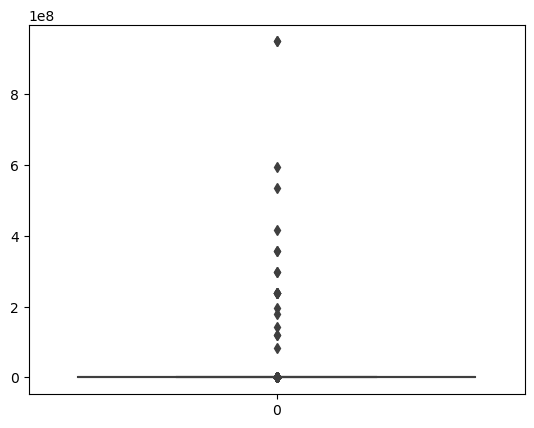

In [765]:
sns.boxplot(df['Avg. Cost For two($)'])

In [766]:
df.shape

(9551, 14)

In [767]:
### Removing price based Outliers Before going into analysis

In [768]:
condition = df['Avg. Cost For two($)'].quantile(.90)
df = df[df['Avg. Cost For two($)'] < condition]
df.shape

(8470, 14)

<Axes: >

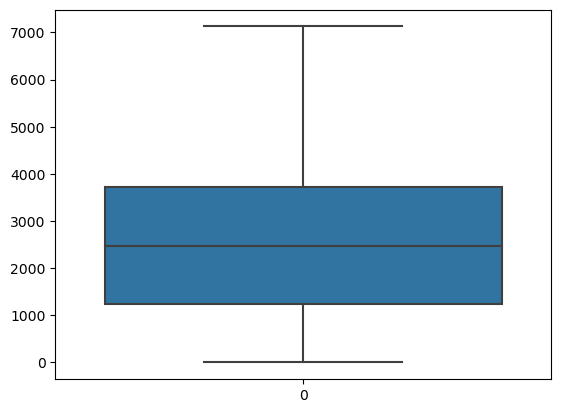

In [769]:
sns.boxplot(df['Avg. Cost For two($)'])

In [773]:
df['Avg. Cost For two($)'].mean()

2519.5734368358917

### Q1. Which cities have the cost more than average cost for two people?

In [784]:
df[df['Avg. Cost For two($)'] > df['Avg. Cost For two($)'].mean()]['City'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Patna', 'Puducherry', 'Pune', 'Ranchi', 'Secunderabad', 'Surat',
       'Vadodara', 'Varanasi', 'Vizag', 'Pretoria'], dtype=object)

### Q2. How does the price range affect a restaurant’s rating?

In [785]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Cuisines',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating text', 'Votes', 'Country Name', 'Avg. Cost For two($)'],
      dtype='object')

Price range is directly affecting the Aggregate rating

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

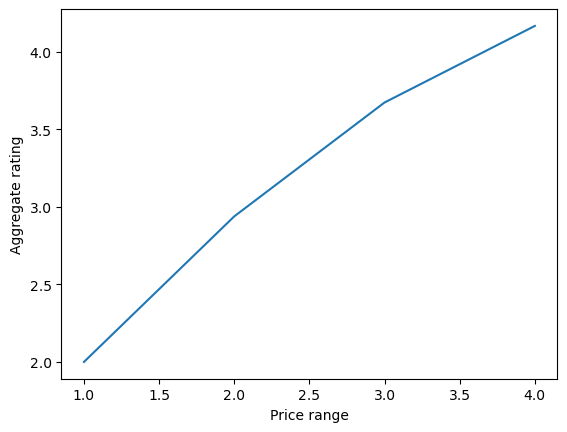

In [792]:
sns.lineplot(df.groupby('Price range')['Aggregate rating'].mean())

### Q3. Do higher-priced restaurants generally receive better ratings?

In [796]:
## get restro with rating > 4.5

In [807]:
price_criteria = df['Avg. Cost For two($)'].quantile(.75)
price_criteria

3717.4

In [826]:
high_price_restro = df.loc[df['Avg. Cost For two($)'] > price_criteria]
high_price_restro

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
624,3400025,Jahanpanah,Agra,"North Indian, Mughlai",No,No,No,No,3,3.9,Good,140,India,5266.32
625,3400341,Rangrezz Restaurant,Agra,"North Indian, Mughlai",No,No,No,No,2,3.5,Good,71,India,4336.97
628,3400017,Pinch Of Spice,Agra,"North Indian, Chinese, Mughlai",No,No,No,No,3,4.2,Very Good,177,India,6195.67
632,3400348,G Thal,Agra,"Rajasthani, Gujarati, Mughlai",No,No,No,No,3,3.6,Good,59,India,4956.54
636,3400033,The Charcoal Chimney,Agra,"North Indian, Chinese, Continental, Mughlai",No,No,No,No,3,3.4,Average,70,India,6815.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9251,3900010,The Great Kabab Factory - Radisson Hotel,Varanasi,"North Indian, Mughlai",No,No,No,No,4,3.3,Average,67,India,6815.24
9252,3900055,I:ba Cafe & Restaurant,Varanasi,"Japanese, American, North Indian, Fast Food",No,No,No,No,4,3.5,Good,83,India,6195.67
9255,3900238,Singh's Delight Restaurant,Varanasi,"Chinese, North Indian",No,No,No,No,3,3.5,Good,57,India,4336.97
9263,2800911,Double Roti,Vizag,"Cafe, Fast Food, American",No,No,No,No,3,3.8,Good,27,India,6195.67


In [827]:
### check how many of them have rating > 4

In [828]:
high_price_restro[high_price_restro['Aggregate rating']>4]

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
628,3400017,Pinch Of Spice,Agra,"North Indian, Chinese, Mughlai",No,No,No,No,3,4.2,Very Good,177,India,6195.67
641,3400105,Pizza Hut,Agra,"Italian, Pizza",No,No,No,No,2,4.4,Very Good,134,India,4336.97
642,3400326,Tea'se Me - Rooftop Tea Boutique,Agra,"Chinese, Italian, Continental, North Indian",No,No,No,No,3,4.2,Very Good,166,India,6195.67
643,3400392,Thaaliwala,Agra,"North Indian, Fast Food",No,No,No,No,2,4.1,Very Good,168,India,4336.97
644,111895,650 - The Global Kitchen,Ahmedabad,"Chinese, Italian, North Indian, Mexican, Medit...",No,No,No,No,3,4.2,Very Good,1582,India,5576.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,3800018,Pizza Hut,Surat,Pizza,No,No,No,No,3,4.1,Very Good,216,India,4956.54
9221,3200005,Little Italy,Vadodara,Italian,No,No,No,No,3,4.1,Very Good,202,India,6195.67
9233,3200537,Freshco - The Health Caf,Vadodara,Cafe,No,No,No,No,2,4.2,Very Good,132,India,4336.97
9235,3200034,Tomato's,Vadodara,"North Indian, Mughlai, Mexican, Thai",No,No,No,No,3,4.1,Very Good,395,India,6195.67


ANSWER

(172 / 1533)*100   = 11.21 %

only approx 11 % of the high priced (75 percentile) restos are having rating more then 4

### Q4. Are expensive restaurants more likely to have table booking or Online Delivery options?

In [834]:
expensive_restros = df[df['Avg. Cost For two($)']>df['Avg. Cost For two($)'].quantile(.90)]

In [835]:
expensive_restros

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
624,3400025,Jahanpanah,Agra,"North Indian, Mughlai",No,No,No,No,3,3.9,Good,140,India,5266.32
628,3400017,Pinch Of Spice,Agra,"North Indian, Chinese, Mughlai",No,No,No,No,3,4.2,Very Good,177,India,6195.67
636,3400033,The Charcoal Chimney,Agra,"North Indian, Chinese, Continental, Mughlai",No,No,No,No,3,3.4,Average,70,India,6815.24
640,3400016,Pind Balluchi,Agra,"North Indian, Mughlai",No,No,No,No,3,3.7,Good,175,India,5576.10
642,3400326,Tea'se Me - Rooftop Tea Boutique,Agra,"Chinese, Italian, Continental, North Indian",No,No,No,No,3,4.2,Very Good,166,India,6195.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9227,3200002,Gazebo Garden Restaurant,Vadodara,North Indian,No,No,No,No,3,3.5,Good,82,India,6195.67
9235,3200034,Tomato's,Vadodara,"North Indian, Mughlai, Mexican, Thai",No,No,No,No,3,4.1,Very Good,395,India,6195.67
9251,3900010,The Great Kabab Factory - Radisson Hotel,Varanasi,"North Indian, Mughlai",No,No,No,No,4,3.3,Average,67,India,6815.24
9252,3900055,I:ba Cafe & Restaurant,Varanasi,"Japanese, American, North Indian, Fast Food",No,No,No,No,4,3.5,Good,83,India,6195.67


In [836]:
## finding the proportion of expensive restros having table booking or online delivery

In [864]:
has_online_and_table_booking = expensive_restros[(df['Has Table booking'] == "Yes") | (df['Has Online delivery'] == 'Yes')]

/tmp/ipykernel_8824/3560474076.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [865]:
has_online_and_table_booking

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
648,113433,Fozzie's Pizzaiolo,Ahmedabad,"Pizza, Italian, Beverages, Desserts",No,Yes,No,No,3,4.3,Very Good,731,India,5576.10
650,18143128,Mocha,Ahmedabad,"Cafe, Continental, Desserts",No,Yes,No,No,3,4.4,Very Good,944,India,6195.67
651,18438944,Blue - Rooftop Cafe Restaurant Bistro,Ahmedabad,"North Indian, Cafe, Italian, Mexican, Continental",No,Yes,No,No,3,3.8,Good,63,India,6195.67
660,113325,Nini's Kitchen,Ahmedabad,"North Indian, Continental, Beverages, Italian,...",No,Yes,No,No,3,4.5,Excellent,1138,India,5885.89
787,122003,The Night Factory,Chandigarh,"North Indian, Chinese, Continental, Pizza",No,Yes,Yes,No,2,3.7,Good,665,India,5266.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9162,18350020,Kargo,Pune,"Charcoal Grill, Italian, North Indian, Europea...",Yes,No,No,No,2,4.4,Very Good,635,India,5576.10
9163,6508117,Sauted Stories,Pune,"Cafe, Italian, Continental",No,Yes,No,No,2,4.2,Very Good,583,India,5266.32
9172,6507495,Apache,Pune,Finger Food,Yes,No,No,No,3,4.1,Very Good,377,India,6195.67
9173,18441490,Barbeque Ville,Pune,North Indian,Yes,No,No,No,3,4.4,Very Good,208,India,6195.67


ANSWER 

(372/541)*100 = 68.761552680221876

Around 70% of the expensive restros having table booking or online delivery

### Q5. How does online delivery availability affect customer votes?

<Axes: xlabel='Has Online delivery', ylabel='Votes'>

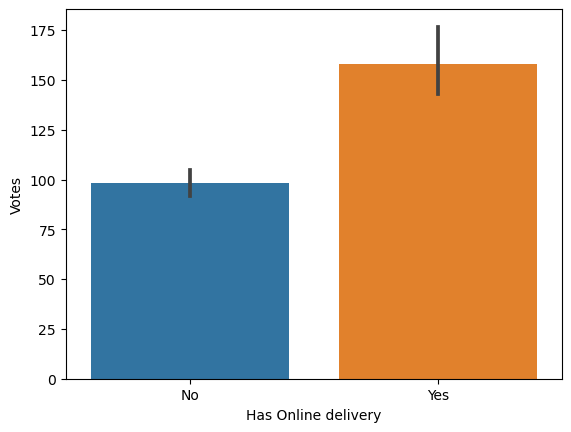

In [873]:
sns.barplot(x = 'Has Online delivery', y = 'Votes', data = df, orient='v')

# City & Country-Based Insights

### Q1. Which city has the most expensive restaurants on average?

In [892]:
expensive_restro = df[df['Avg. Cost For two($)'] > df['Avg. Cost For two($)'].quantile(.99)]

In [893]:
expensive_restro

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
636,3400033,The Charcoal Chimney,Agra,"North Indian, Chinese, Continental, Mughlai",No,No,No,No,3,3.4,Average,70,India,6815.24
812,71492,Ciclo Cafe,Chennai,"Cafe, Continental",No,No,No,No,3,4.1,Very Good,1004,India,6815.24
884,1804,Berco's,Faridabad,"Chinese, Thai",No,Yes,No,No,3,3.8,Good,508,India,6815.24
1142,130275,Burger Factory,Goa,Fast Food,No,No,No,No,4,4.8,Excellent,415,India,6815.24
1146,16512186,St. Anthony's,Goa,"North Indian, Chinese, Continental, Goan, Seafood",No,No,No,No,4,3.8,Good,911,India,6815.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,387,Nirula's,Noida,"Fast Food, North Indian, Chinese, Desserts, Ic...",Yes,Yes,No,No,3,2.5,Average,221,India,6815.24
8479,18425782,Crazy Noodles,Noida,"Chinese, Thai",No,Yes,No,No,3,0.0,Not rated,2,India,6815.24
8849,4469,Binge Restaurant,Noida,"North Indian, Chinese, Continental",Yes,No,No,No,3,3.2,Average,325,India,6815.24
9090,486,Crazy Noodles,Noida,"Chinese, Thai",Yes,Yes,No,No,3,3.6,Good,507,India,6815.24


In [895]:
df.City.unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras_lia', 'Rio de Janeiro', 'So Paulo', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Miller', 'Monroe', 'Montville', 'Ojo Caliente', 'Orlando',
       'Palm Cove', 'Paynesville', 'Penola', 'Pensacola',
       'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham E

### Q2. Which city has the highest-rated restaurants?

In [896]:
high_rated_restros = df[df['Aggregate rating'] > 4.5]

In [899]:
high_rated_restros.City.unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'Taguig City', 'Bras_lia', 'Rio de Janeiro',
       'So Paulo', 'Athens', 'Augusta', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Columbus', 'Dalton', 'Davenport',
       'Des Moines', 'Gainesville', 'Macon', 'Orlando', 'Pensacola',
       'Rest of Hawaii', 'Savannah', 'Tampa Bay', 'Abu Dhabi', 'Dubai',
       'Sharjah', 'Agra', 'Ahmedabad', 'Bangalore', 'Bhopal', 'Chennai',
       'Coimbatore', 'Goa', 'Gurgaon', 'Guwahati', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mumbai', 'New Delhi',
       'Pune', 'Secunderabad', 'Vizag', 'Auckland', 'Wellington City',
       'Birmingham', 'Edinburgh', 'London', 'Manchester', 'Doha',
       'Cape Town', 'Inner City', 'Pretoria', 'Sandton', 'Ankara',
       'stanbul'], dtype=object)

### Q3. How do restaurant ratings vary between different countries?

In [915]:
restro_rating_country = df.groupby('Country Name')['Aggregate rating'].mean().sort_values(ascending = False)

In [917]:
restro_rating_country

Country Name
Phillipines       4.468182
Turkey            4.300000
New Zealand       4.262500
UAE               4.233333
South Africa      4.210000
United Kingdom    4.087500
Qatar             4.060000
United States     4.004378
Brazil            3.763333
Australia         3.658333
Canada            3.575000
Singapore         3.575000
India             2.368944
Name: Aggregate rating, dtype: float64

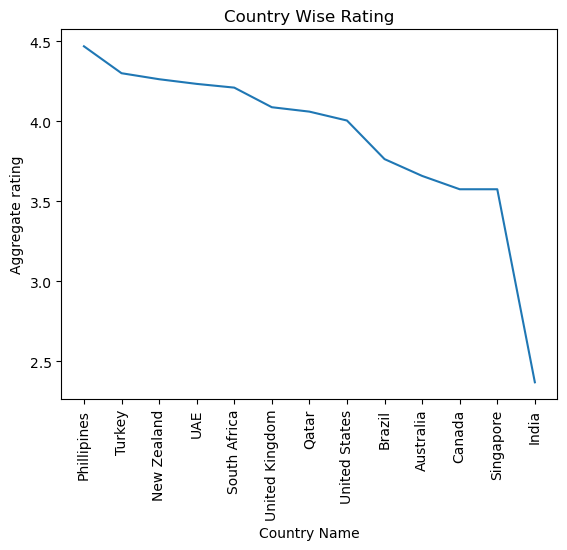

In [920]:
sns.lineplot(restro_rating_country)
plt.xticks(rotation = 90)
plt.title('Country Wise Rating')
plt.savefig('Country Wise Rating.png')

### Q4. Which city has the most restaurant options available?

In [924]:
restro_cityWise = df.groupby('City').count()['Restaurant Name'].sort_values(ascending = False)

In [939]:
restro_cityWise = restro_cityWise[restro_cityWise > 10]

In [949]:
restro_cityWise = pd.DataFrame(restro_cityWise)
restro_cityWise

,Restaurant Name
City,
New Delhi,4901
Noida,995
Gurgaon,932
Faridabad,242


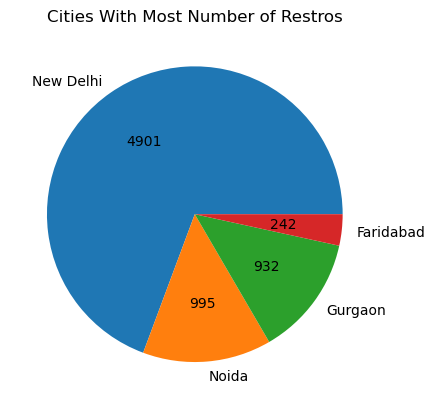

In [968]:
label = list(restro_cityWise.index)
plt.pie(restro_cityWise['Restaurant Name'], labels=label, autopct=lambda p: f'{p * sum(restro_cityWise["Restaurant Name"]) / 100:.0f}')
plt.title('Cities With Most Number of Restros')
plt.savefig('Cities With Most Number Of Restros')

### Q5. Is there a relationship between restaurant cost and customer votes?

In [970]:
df.head(2)

,Restaurant ID,Restaurant Name,City,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country Name,Avg. Cost For two($)
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",Yes,No,No,No,3,4.8,Excellent,314,Phillipines,80.05
1,6304287,Izakaya Kikufuji,Makati City,Japanese,Yes,No,No,No,3,4.5,Excellent,591,Phillipines,87.32


In [976]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df['Avg. Cost For two($)'], df['Votes'])

print(f"Spearman Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant correlation between restaurant cost and customer votes.")
else:
    print("There is no significant correlation between restaurant cost and customer votes.")

Spearman Correlation Coefficient: 0.1871
P-value: 0.0000
There is a significant correlation between restaurant cost and customer votes.
